# Flying Mantines

ModSim Project 3

Lydia Hodges and Chase Joyner

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)

In [1]:
%matplotlib inline

from modsim import *

In [4]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
degree = UNITS.degree
radian = UNITS.radian

In [111]:
condition_m = Condition(x = 0 * m, 
                      y = 0 * m,
                      g = 9.8 * m/s**2,
                      diameter = 6.7 * m,
                      mass = 10000000 * kg,
                      rho = 1.2 * kg/m**3,
                      angle = 90 * degree,
                      den = 1000 * kg/m**3,
                      C_d = 1.28,   #1.28 * np.sin(np.deg2rad(angle)),
                      C_l = 2,      #2 * np.pi * np.deg2rad(angle),
                      wing_area = 14.14 * m**2,
                      velocity = 6.7 * m / s,
                      bh = 4.9 * m,
                      duration = 1 * s)
angle_array = linrange(29, 90, 1)

In [20]:
condition_p = Condition(x = 14 * m,
                        y = 4.9 * m,
                        velocity = -11.18 * m/s,
                        mass = 70 * kg,
                        angle = 0 * degree,
                        density = 985 * kg/m**2,
                        duration = 1 * s,
                        diameter = 0.18 * m)

In [21]:
def make_system(condition):
    
    unpack(condition)
    
    # convert angle to degrees
    theta = np.deg2rad(angle)
    
    # compute x and y components of velocity
    vx, vy = pol2cart(theta, velocity)
    
    # make the initial state
    init = State(x=x, y=y, vx=vx, vy=vy)
    
    # compute area from diameter
    area = np.pi * (diameter/2)**2
    
    # compute timestamps
    ts = linspace(0, duration, 101)
    
    return System(init=init, g=g, mass=mass, 
                  area=area, rho=rho, C_d=C_d, ts=ts)

In [112]:
system = make_system(condition_m)
system_2 = make_system(condition_p)

In [23]:
def slope_func_p(state, t, system):
    
    x, y, vx, vy = state
    unpack(system)
    
    a_grav = Vector(0, -g)

    v = Vector(vx, vy)
    
    ax = 0 * m**2
    ay = 0 * m**2
    
    return vx, vy, ax, ay

In [24]:
slope_func_p(system_2.init, 0, system_2)

(<Quantity(-11.18, 'meter / second')>,
 <Quantity(-0.0, 'meter / second')>,
 <Quantity(0, 'meter ** 2')>,
 <Quantity(0, 'meter ** 2')>)

In [25]:
run_odeint(system_2, slope_func_p)
print(system_2.results)

            x    y     vx   vy
0.00  14.0000  4.9 -11.18 -0.0
0.01  13.8882  4.9 -11.18  0.0
0.02  13.7764  4.9 -11.18  0.0
0.03  13.6646  4.9 -11.18  0.0
0.04  13.5528  4.9 -11.18  0.0
0.05  13.4410  4.9 -11.18  0.0
0.06  13.3292  4.9 -11.18  0.0
0.07  13.2174  4.9 -11.18  0.0
0.08  13.1056  4.9 -11.18  0.0
0.09  12.9938  4.9 -11.18  0.0
0.10  12.8820  4.9 -11.18  0.0
0.11  12.7702  4.9 -11.18  0.0
0.12  12.6584  4.9 -11.18  0.0
0.13  12.5466  4.9 -11.18  0.0
0.14  12.4348  4.9 -11.18  0.0
0.15  12.3230  4.9 -11.18  0.0
0.16  12.2112  4.9 -11.18  0.0
0.17  12.0994  4.9 -11.18  0.0
0.18  11.9876  4.9 -11.18  0.0
0.19  11.8758  4.9 -11.18  0.0
0.20  11.7640  4.9 -11.18  0.0
0.21  11.6522  4.9 -11.18  0.0
0.22  11.5404  4.9 -11.18  0.0
0.23  11.4286  4.9 -11.18  0.0
0.24  11.3168  4.9 -11.18  0.0
0.25  11.2050  4.9 -11.18  0.0
0.26  11.0932  4.9 -11.18  0.0
0.27  10.9814  4.9 -11.18  0.0
0.28  10.8696  4.9 -11.18  0.0
0.29  10.7578  4.9 -11.18  0.0
...       ...  ...    ...  ...
0.71   6

In [113]:
def slope_func_m(state, t, system):
    
    x, y, vx, vy = state
    unpack(system)
    
    a_grav = Vector(0, -g)

    v = Vector(vx, vy)
    
    f_drag = -C_d * wing_area * rho * (v**2 / 2)
    a_drag = f_drag / mass
    
    f_lift = C_l * wing_area * rho * (v**2 / 2)
    a_lift = f_lift / mass
    
    a = a_grav + a_drag + a_lift
    
    print(mass, C_l, a_lift, C_d, a_drag)
    
    return vx, vy, a.x, a.y

In [114]:
slope_func_m(system.init, 0, system)

10000000 kilogram 2 [  2.85589327e-37   7.61693520e-05] meter / second ** 2 1.28 [ -1.82777169e-37  -4.87483853e-05] meter / second ** 2


(<Quantity(4.1025667771436333e-16, 'meter / second')>,
 <Quantity(6.7, 'meter / second')>,
 <Quantity(1.0281215772091307e-37, 'meter / second ** 2')>,
 <Quantity(-9.79997257903328, 'meter / second ** 2')>)

In [115]:
run_odeint(system, slope_func_m)
print(system.results)

10000000 kilogram 2 [  2.85589327e-37   7.61693520e-05] meter / second ** 2 1.28 [ -1.82777169e-37  -4.87483853e-05] meter / second ** 2
10000000 kilogram 2 [  2.85589327e-37   7.61693520e-05] 1 / meter 1.28 [ -1.82777169e-37  -4.87483853e-05] 1 / meter
10000000 kilogram 2 [  2.85589327e-37   7.61690806e-05] 1 / meter 1.28 [ -1.82777169e-37  -4.87482116e-05] 1 / meter
10000000 kilogram 2 [  2.85589327e-37   7.61690806e-05] 1 / meter 1.28 [ -1.82777169e-37  -4.87482116e-05] 1 / meter
10000000 kilogram 2 [  2.85589327e-37   7.61688092e-05] 1 / meter 1.28 [ -1.82777169e-37  -4.87480379e-05] 1 / meter
10000000 kilogram 2 [  2.85589327e-37   7.61688092e-05] 1 / meter 1.28 [ -1.82777169e-37  -4.87480379e-05] 1 / meter
10000000 kilogram 2 [  2.85589327e-37   7.34790651e-05] 1 / meter 1.28 [ -1.82777169e-37  -4.70266016e-05] 1 / meter
10000000 kilogram 2 [  2.85589327e-37   7.34790651e-05] 1 / meter 1.28 [ -1.82777169e-37  -4.70266016e-05] 1 / meter
10000000 kilogram 2 [  2.85589327e-37   7.08

Saving figure to file Proj3_SingleRun.pdf


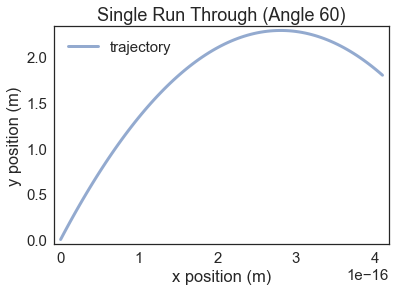

In [116]:
xs = system.results.x
ys = system.results.y
newfig()
plot(xs, ys, label='trajectory')
decorate(xlabel='x position (m)',
         ylabel='y position (m)',
        title='Single Run Through (Angle 60)')
savefig('Proj3_SingleRun.pdf')

In [32]:
def sweep_param(angle_array, system):
    newfig()
    decorate(xlabel='x position (m)',
             ylabel='y position (m)',
            title='Sweep Angle (30 - 90)')
    for ang in angle_array:
        condition_m.set(angle=ang)
        system = make_system(condition_m)
        run_odeint(system, slope_func_m)
        xs = system.results.x
        ys = system.results.y
        plot(xs, ys)
    savefig('Proj3_SweepAngle.pdf')

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
Saving figure to file Proj3_SweepAngle.pdf


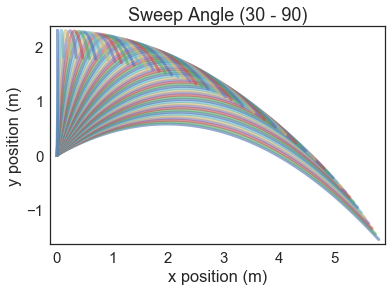

In [33]:
sweep_param(angle_array, system)

In [309]:
def run_sim(state, system):
    
    run_odeint(system, slope_func_m)
    h = system.results.y.loc(1.5)
    f = slope_func_m(system.init, h, system)
    acc = sqrt((f.a.x)**2 + (f.a.y)**2)
    force = mass * acc
    print(force)

In [93]:
run_sim(system.init, system)

AttributeError: 'tuple' object has no attribute 'a'